In [8]:
import scipy as sp, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import pandas as pd

In [9]:
bioconda = 6819
conda = 50*43
pip = 186000
apt = 51000
easybuild = 1808
gnuguix = 9789
linuxbrew = 251
spack = 2907
cran = 16200

labels = ["bioconda", "conda","pip", "apt", "easybuild", "gnuguix", "linuxbrew", "spack", "cran"]
num_packages = [bioconda,conda, pip, apt, easybuild, gnuguix, linuxbrew, spack, cran]

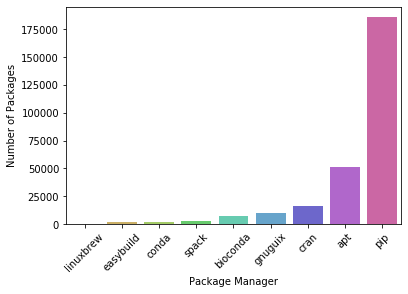

In [10]:
df = pd.DataFrame({
    'Name': labels,
    'Number of Packages': num_packages
})

result = df.groupby(['Name'])['Number of Packages'].aggregate(np.median).reset_index().sort_values('Number of Packages')
ax = sns.barplot(x='Name',y='Number of Packages', data=df, order=result['Name'],  palette="hls")

figure1 = ax.get_figure()
figure1.savefig('package manager bar plot.png', dpi = 1000, bbox_inches = 'tight')
plt.ylabel('Number of Packages')
plt.xlabel('Package Manager')
font = {'size'   : 10,
       'family' : 'monospace'}

plt.rc('font', **font)

for item in ax.get_xticklabels():
    item.set_rotation(45)

figure1 = ax.get_figure()
figure1.savefig('package manager bar plot.png', dpi = 1000, bbox_inches = 'tight')


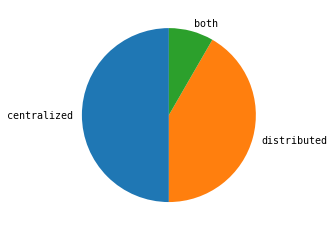

In [11]:
types = ["centralized", "distributed", "both"]
sizes = [6,5,1]

fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=types, startangle=90);
font = {'size'   : 15,
       'family' : 'monospace'}

plt.rc('font', **font)

piechart = ax1.get_figure()
piechart.savefig('package manager pie chart.png', dpi = 1000, bbox_inches = 'tight')

In [12]:
google_data = pd.read_csv('all-google.csv')
google_data

,Name,Google Scholar Results,Citations,Trends
0,Bioconda,335,105,4.344828
1,Biolinux,738,156,0.000000
2,Easybuild,750,22,0.000000
3,GNU Guix,109,12,0.000000
4,Spack (spack package),1290,49,0.000000
5,linuxbrew,64,7,0.000000
6,Vagrant (Vagrant vm),2910,0,8.375479
7,Docker,0,0,58.375479
8,Singularity,0,0,0.000000
9,pip,0,0,14.053640


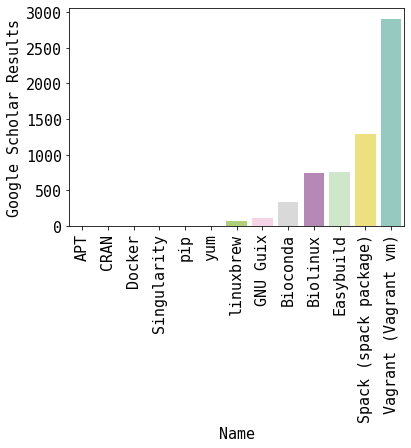

In [13]:
result = google_data.groupby(['Name'])['Google Scholar Results'].aggregate(np.median).reset_index().sort_values('Google Scholar Results')
ax2 = sns.barplot(data = google_data, x = 'Name', y = 'Google Scholar Results', palette="Set3", order=result['Name'])

for item in ax2.get_xticklabels():
    item.set_rotation(90)
    
piechart = ax2.get_figure()
piechart.savefig('scholar-res.png', dpi = 1000, bbox_inches = 'tight')

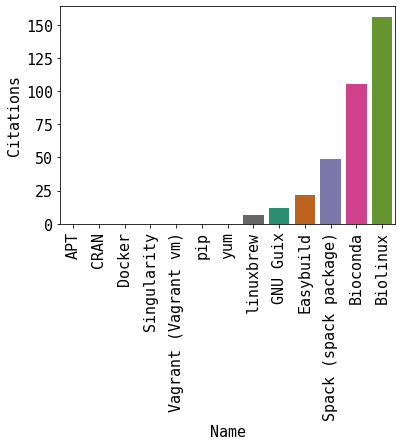

In [14]:
result = google_data.groupby(['Name'])['Citations'].aggregate(np.median).reset_index().sort_values('Citations')
ax3=sns.barplot(data = google_data, x = 'Name', y = 'Citations', palette="Dark2", order=result['Name'])

for item in ax3.get_xticklabels():
    item.set_rotation(90)

piechart = ax3.get_figure()
piechart.savefig('citations.png', dpi = 1000, bbox_inches = 'tight')

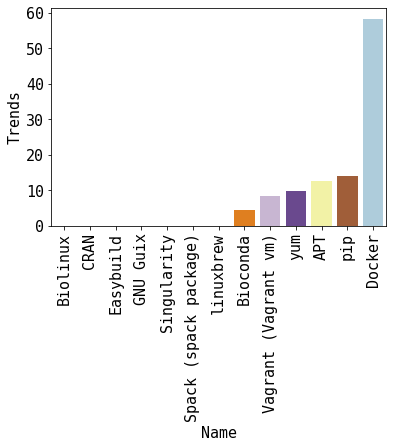

In [15]:
result = google_data.groupby(['Name'])['Trends'].aggregate(np.median).reset_index().sort_values('Trends')
ax4 = sns.barplot(data = google_data, x = 'Name', y = 'Trends', palette="Paired", order=result['Name'])

for item in ax4.get_xticklabels():
    item.set_rotation(90)

piechart = ax4.get_figure()
piechart.savefig('trends.png', dpi = 1200, bbox_inches = 'tight')

In [16]:
df = pd.read_csv('fig1.csv')
df

,Name,Year,Type
0,Bioconda,2015,package manager
1,Docker,2013,container
2,Vagrant,2010,container
3,Singularity,2016,container
4,pip,2008,package manager
5,APT,1998,package manager
6,Easybuild,2012,package manager
7,GNU Guix,2013,package manager
8,linuxbrew,2009,package manager
9,Spack,2013,package manager


Text(0.5, 1.0, 'Release Dates')

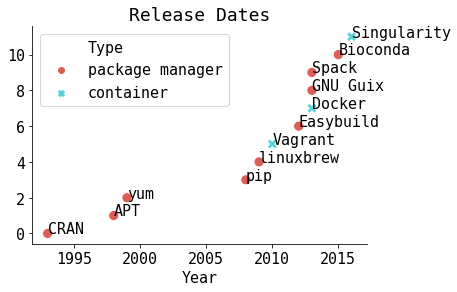

In [22]:
yax = np.arange(0,12)

result = df.groupby(['Name','Type'])['Year'].aggregate(np.median).reset_index().sort_values('Year')
df2 = result
#df2['Type'] = df[['Type']]
p1 = sns.scatterplot(x='Year', y=yax, hue='Type', data = df2, style='Type', s=100, palette='hls');

names=df2[['Name']]

years=df2[['Year']]

ylines = np.arange(1,13)
lines = [2,0,11,10,9,8,4,3,5,7,1,6]

j = 0
for line in lines:
    p1.text(df2.Year[line], ylines[j]-1, df2.Name[line])
    j = j+1
sns.despine(ax=p1)
p1.set_title('Release Dates')

In [23]:
figure1 = p1.get_figure()
figure1.savefig('figure1.png', dpi = 1000, bbox_inches = 'tight')